In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [7]:
iris = datasets.load_iris()

In [9]:
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [13]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

### Making Data Linearly Separable

In [18]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [26]:
X, y = make_moons(n_samples=100, noise=0.15)

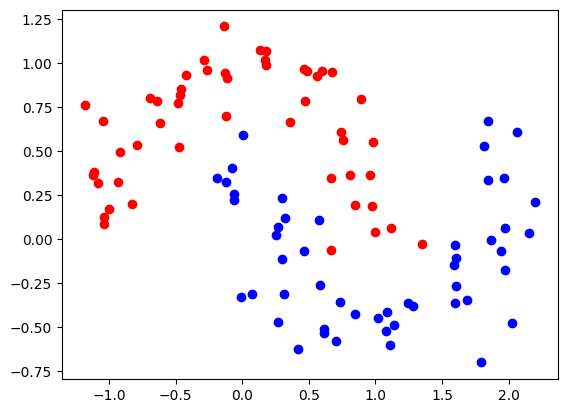

In [27]:
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color="red", label="class 0")
plt.scatter(X[y==1][:, 0], X[y==1][:,1], color='blue', label='class 1')

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ]
)
polynomial_svm_clf.fit(X, y)

/Users/rezatabrizi/dev/Repos/envs/ml_learn/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [48]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X, y)
x_poly[0]

array([1.        , 2.06364546, 0.61076695, 4.2586326 , 1.26040645,
       0.37303627, 8.78830783, 2.60103204, 0.7698146 , 0.22783822])

Text(0, 0.5, 'Feature 2')

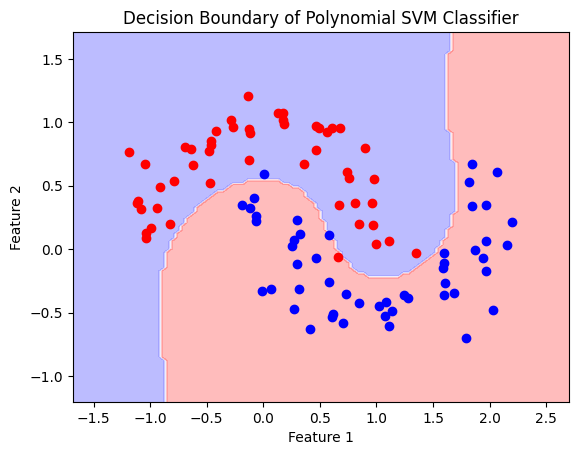

In [43]:
import numpy as np
x0s = np.linspace(X[:, 0].min()-0.5, X[:, 0].max() + 0.5, 100)
x1s = np.linspace(X[:, 1].min()-0.5, X[:, 1].max() + 0.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = polynomial_svm_clf.predict(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_predict, alpha=0.3, cmap=plt.cm.bwr)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1")
plt.title("Decision Boundary of Polynomial SVM Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")